In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('1.01.+Simple+linear+regression.csv')
data.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [3]:
x=data['SAT']
y=data['GPA']

In [4]:
x.shape

(84,)

In [5]:
y.shape

(84,)

In [6]:
x_matrix=x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [7]:
reg=LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
reg.score(x_matrix,y)

0.40600391479679765

In [9]:
reg.coef_

array([0.00165569])

In [10]:
reg.intercept_

0.2750402996602803

In [11]:
reg.predict([[1740]])

array([3.15593751])

In [12]:
new_data=pd.DataFrame(data=[1780,1200,1900,1600,1500],columns=['SAT'])
new_data

,SAT
0,1780
1,1200
2,1900
3,1600
4,1500


In [13]:
reg.predict(new_data)

array([3.22216503, 2.26186596, 3.42084759, 2.92414118, 2.75857237])

In [14]:
new_data['Predicted GPA']=reg.predict(new_data)
new_data

,SAT,Predicted GPA
0,1780,3.222165
1,1200,2.261866
2,1900,3.420848
3,1600,2.924141
4,1500,2.758572


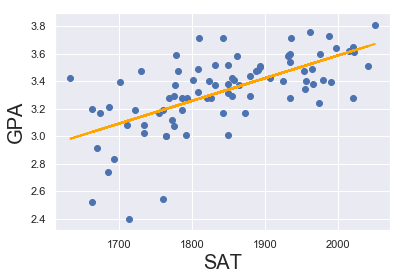

In [15]:
plt.scatter(x,y)
yhat=reg.coef_*x_matrix+reg.intercept_
fig=plt.plot(x,yhat,lw=2,c='orange',label='regression')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [16]:
data=pd.read_csv('1.02.+Multiple+linear+regression.csv')
data.head(10)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
5,1670,2.91,1
6,1764,3.00,2
7,1764,3.00,1
8,1792,3.01,2
9,1850,3.01,3


In [17]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [18]:
x=data[['SAT','Rand 1,2,3']]
y=data['GPA']

In [19]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
import statsmodels.api as sm
X=sm.add_constant(x)
results=sm.OLS(y,x).fit()
results.summary()

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.69e-99
Time:                        11:19:24   Log-Likelihood:                 12.459
No. Observations:                  84   AIC:                            -20.92
Df Residuals:                      82   BIC:                            -16.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   3.22e-05     56.146      0.000       0.002       0.002
Rand 1,2,3    -0.0051      0.027     -0.190      0.850      -0.058       0.048
==============================================================================
Omnibus:                        9.821   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.353
Skew:                          -0.594   Prob(JB):                      0.00343
Kurtosis:                       4.353   Cond. No.                     2.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
reg.coef_


array([ 0.00165354, -0.00826982])

In [22]:
reg.intercept_

0.29603261264909486

In [23]:
 reg.score(x,y)

0.4066811952814285

# FORMULA
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [24]:
# n=no of observations 
#p=no of predictors

In [25]:
x.shape

(84, 2)

In [26]:
r2=reg.score(x,y)
n=x.shape[0]
p=x.shape[1]
adjusted_r2=1 - (1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023